In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dill
from tqdm import tqdm
import sys
import os

# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.append(os.path.dirname(current_dir))

from analyze.report import calculate_vector_strength_from_result, calculate_vector_strength_from_result_polar


/mnt/c/Users/utente/Desktop/repos/hears_env/lib/python3.12/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [2]:
# List directory contents
result_dir = '/mnt/c/Users/utente/OneDrive - Politecnico di Milano/work/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 

tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_0.1kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1_myoga_inv.pic
tone_0.1kHz_70dB&TanCarney&subject_1_myoga_null.pic
tone_0.1kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_2.pic
tone_0.2kHz_70dB&TanCarney&subject_1.pic
tone_0.2kHz_70dB&TanCarney&subject_1_long.pic
tone_0.3kHz_70dB&TanCarney&subject_1.pic
tone_0.4kHz_70dB&TanCarney&subject_1.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
tone_0.7kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.9kHz_70dB&TanCarney&subject_1.pic
tone_1.0kHz_70dB&TanCarney&subject_1.pic
tone_1.1kHz_70dB&TanCarney&subject_1.pic
tone_1.2kHz_70dB&TanCarney&subject_1.pic
tone_1.3kHz_70dB&TanCarney&subject

In [3]:
title = 'vs_data_100_ANFs_4_tones.pkl'
result_path = result_dir + title

# Load data once per frequency
with open(result_path, "rb") as file:
    result = dill.load(file, ignore=True)


In [4]:
result['cf_targets']

array([  20,   40,   60,   80,  100,  120,  140,  160,  180,  200,  220,
        240,  260,  280,  300,  320,  340,  360,  380,  400,  420,  440,
        460,  480,  500,  520,  540,  560,  580,  600,  620,  640,  660,
        680,  700,  720,  740,  760,  780,  800,  820,  840,  860,  880,
        900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080, 1100,
       1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320,
       1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540,
       1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760,
       1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980,
       2000])

In [5]:
result['tones_kHz']

[0.1, 0.5, 1.0, 1.5]

In [8]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'bo

In [10]:
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlesize']= 'large'
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['axes.labelsize'] = 14    # Size of axis labels (x and y labels)
plt.rcParams['xtick.labelsize'] = 12   # Size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12   # Size of y-axis tick labels
plt.rcParams['legend.fontsize'] = 12   # Size of the legend text
# Make axis labels bold
plt.rcParams['axes.labelweight'] = 'bold'  # Makes x and y axis labels bold
plt.rcParams['legend.title_fontsize'] = 14  # Makes x and y axis labels bold

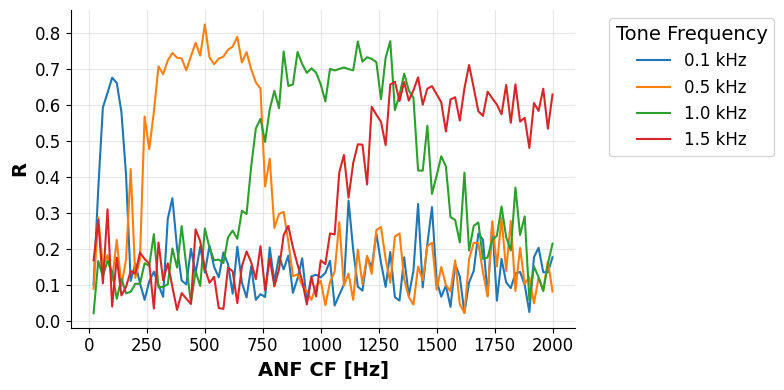

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
for i, tone in enumerate(result['tones_kHz']):
    ax.plot(result['cf_targets'], result['vs_data'][i], label=f'{tone} kHz')

ax.set_xlabel('ANF CF [Hz]')
ax.set_ylabel('R')
ax.legend(title = 'Tone Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
fig.tight_layout()

In [13]:
title = 'vs_data_15_ANFs_15_tones.pkl'
result_path = result_dir + title

# Load data once per frequency
with open(result_path, "rb") as file:
    result_2 = dill.load(file, ignore=True)

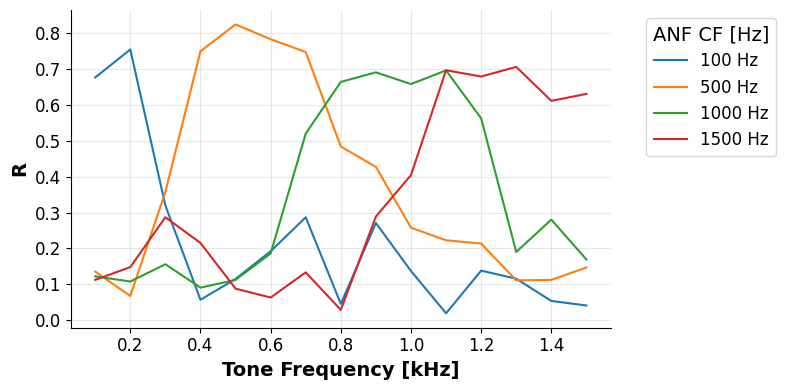

In [14]:
cf_set = [100,500,1000,1500]
indexes = [np.where(result_2['cf_targets'] == val)[0][0] for val in cf_set]

fig, ax = plt.subplots(figsize = (8,4))
for i, cf in zip(indexes,cf_set):
    ax.plot(result_2['tones_kHz'], result_2['vs_data'][:,i], label=f'{cf} Hz')

ax.set_xlabel('Tone Frequency [kHz]')
ax.set_ylabel('R')
ax.legend(title = 'ANF CF [Hz]', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
fig.tight_layout()